### Pair Programming - Machine Learning / Asunciones

El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:
- Normalidad (ya la deberíais haber evaluado).
- Homogeneidad de varianzas.
- Independencia de las variables.

Cada asunción la deberéis testar de forma visual y analítica.

In [16]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
import seaborn as sns


import researchpy as rp
from scipy import stats
from scipy.stats import levene
from scipy.stats import kstest

plt.rcParams["figure.figsize"] = (10,8) 

In [17]:
df = pd.read_csv("data/adult.data_limpio.csv", index_col = 0)

- Asunción de normalidad:

In [18]:
df.shape

(32560, 13)

In [19]:
df.head()

,work_class,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary
39,,,,,,,,,,,,,
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,24006
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,44640
53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,18011
28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,29747
37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,19350


Observamos que nuestro DataFrame tiene más de 5 mil líneas, por lo tanto vamos a usar el test de Kolmogórov-Smirnov.

In [20]:
kstest(df["salary"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

Un p-valor menor a 0.05 nos indica que debemos rechazar la hipótesis nula y que nuestros datos no son normales.

Por lo tanto, para poder introducirlo en un modelo de machine learning, deberíamos realizar una serie de cambios que veremos próximamente.

- Homogeneidad de varianzas.

Vamos a utilizar el test de Levene porque es más robusto, y se recomienda su uso para datos que no son normales.

In [21]:
df.columns

Index(['work_class', 'education', 'education_yrs', 'marital_status',
       'occupation', 'relationship', 'ethnicity', 'gender', 'capital_gain',
       'capital_lost', 'hours_week', 'country', 'salary'],
      dtype='object')

In [22]:
resultados = {}

numericas_col = df.select_dtypes(include = np.number).drop("salary", axis = 1).columns

for col in numericas_col:

    statistic, p_val = levene(df[col], df.salary, center='median')
    
    resultados[col] = p_val


In [23]:
resultados

{'education_yrs': 0.0,
 'capital_gain': 0.0,
 'capital_lost': 0.0,
 'hours_week': 0.0}

Como podemos observar, todos los valores son menores de 0.05, por lo tanto no se cumple la asunción. Esto quiere decir que las variables son independientes unas de otras.

Quizá nos dé estos resultados porque deberíamos estar trabajando sobre los residuos, cosa que aún no sabemos lo que es.

- Independencia de las variables.

In [24]:
crosstab, test_results, expected = rp.crosstab(df["salary"], df["hours_week"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [25]:
crosstab.head()

hours_week                                               ...       \
hours_week          1    2    3    4    5    6    7    8    9   10  ...   90   
salary                                                              ...        
18000             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
18001             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
18003             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
18008             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
18009             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

                                                          
hours_week   91   92   94   95   96   97   98   99   All  
salary                                                    
18000       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.01  
18001       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  
18003       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  
18008       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  
18009       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.01  

[5 rows x 95 columns]

A la vista de los resultados anteriores, no nos extraña que continúe dándonos 0.

Estas dos variables quizás no están correlacionadas porque los datos que corresponden a salary nos los hemos inventado con un random. 

In [26]:
crosstab, test_results, expected = rp.crosstab(df["salary"], df["hours_week"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [27]:
crosstab.head()

hours_week                                               ...       \
hours_week          1    2    3    4    5    6    7    8    9   10  ...   90   
salary                                                              ...        
18000             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
18001             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
18003             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
18008             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
18009             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

                                                          
hours_week   91   92   94   95   96   97   98   99   All  
salary                                                    
18000       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.01  
18001       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  
18003       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  
18008       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.00  
18009       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.01  

[5 rows x 95 columns]

Estos resultados nos indican que son independientes, lo que se puede deber a que hemos randomizado el salario, dado que, por norma general, sí que te pagan por horas, por lo tanto, al menos estas dos columnas, deberían estar estrechamente interrelacionadas.

- Asunción de homocedasticidad

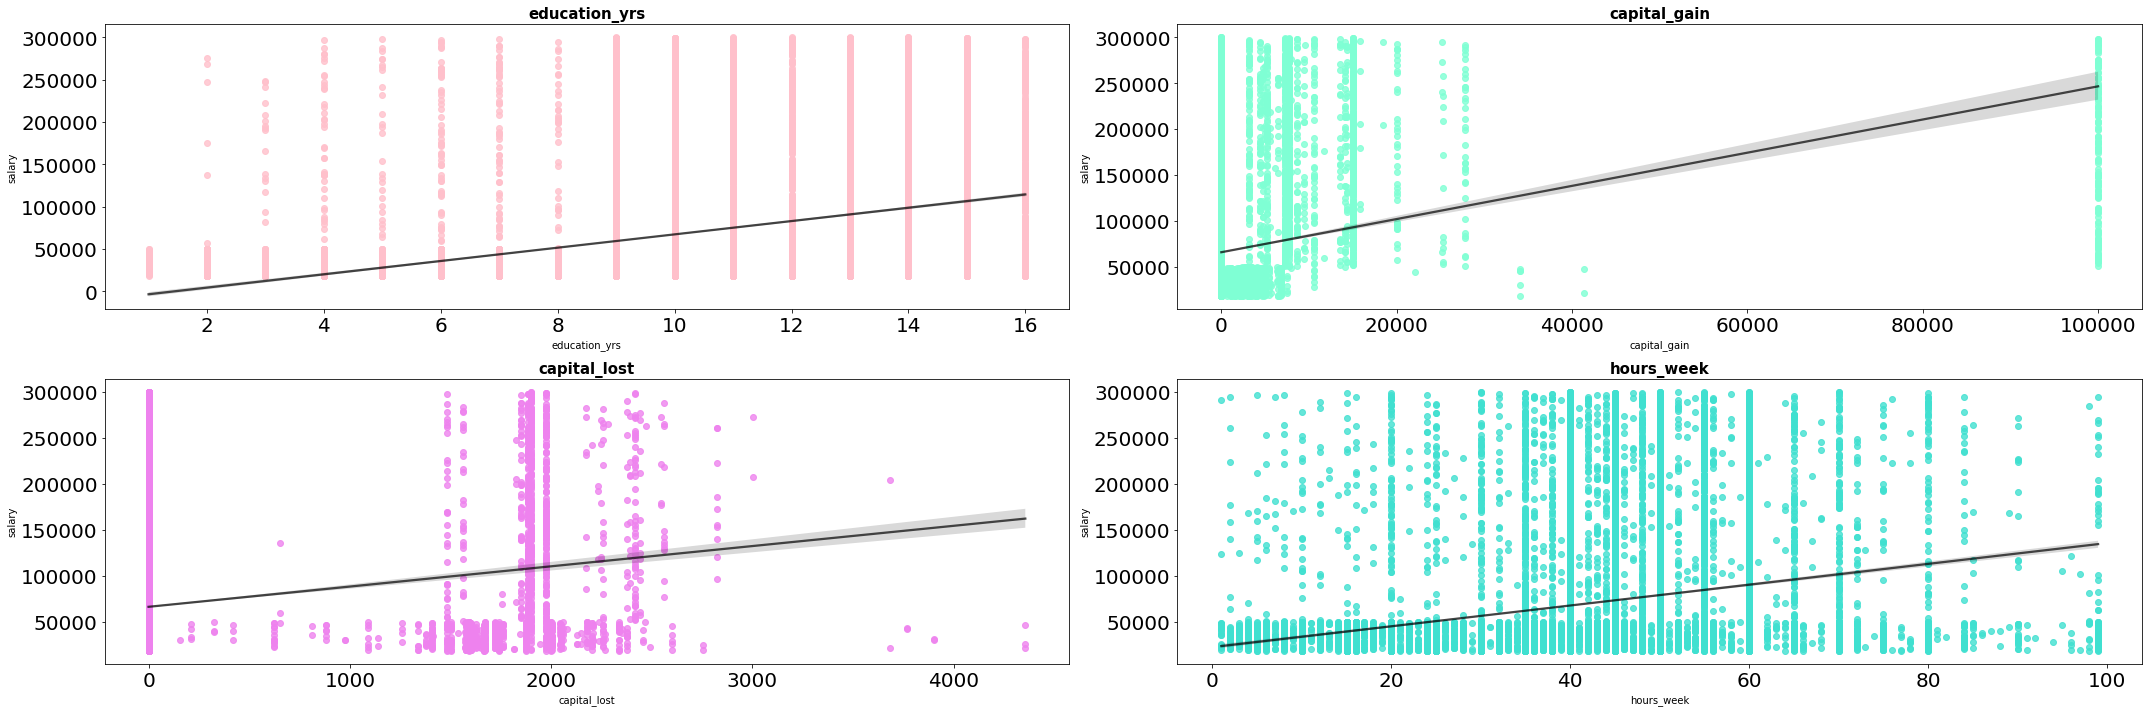

In [32]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

lista_colores = ["pink", "aquamarine", "violet", "turquoise"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).drop("salary", axis=1)
columnas_numeric = columnas_numeric.columns

for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = "salary",
        color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    axes[i].tick_params(labelsize = 20)

    axes[i].set_ylabel("salary")
    
fig.tight_layout();

Podemos observar que nuestros datos no son ni homocedásticos ni heterocedásticos tampoco. No se cumple la asunción.